 Compute Confusion Matrix

 Compute F1 Score 

 Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use            numpy.trapz(tpr_array, fpr_array) https://stackoverflow.com/q/53603376/4084039, https://stackoverflow.com/a/39678975/4084039 Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC

 Compute Accuracy Score 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#reading csv and arriving at y_predicted based on the probability score
df_a=pd.read_csv('5_a.csv')
df_a
for i in df_a.proba:
  if i > 0.5 or i==0.5:
    df_a['y_predicted'] = 1
  else:
    df_a['y_predicted'] = 0
  


In [ ]:
df_a.head(20)
df_a.iloc[:,1]

0        0.637387
1        0.635165
2        0.766586
3        0.724564
4        0.889199
           ...   
10095    0.665371
10096    0.607961
10097    0.777724
10098    0.846036
10099    0.679507
Name: proba, Length: 10100, dtype: float64

In [ ]:
#Calculating the Total Number positive and Negative points
def calculate_total_pos_neg_points(data_frame):
    total_number_positive_points = data_frame.loc[data_frame['y']==1]
    total_number_positive_points = len(total_number_positive_points)
    total_number_negative_points = data_frame.loc[data_frame['y']==0]
    total_number_negative_points = len(total_number_negative_points)
    total_number_points = (total_number_positive_points + total_number_negative_points)
    return total_number_positive_points, total_number_negative_points,total_number_points

In [ ]:
#############have to REMOVE REMOVE THIS##########
def confusion_matrix(data):
    count_tn=len(data[(data['y']==0) & (data['y_pred']==0)])
    count_tp=len(data[(data['y']==1) & (data['y_pred']==1)]) #calculating tn,tp,fn,fp
    count_fn=len(data[(data['y']==1) & (data['y_pred']==0)])
    count_fp=len(data[(data['y']==0) & (data['y_pred']==1)])
    return count_fn,count_fp,count_tn,count_tp

In [ ]:
#############have to REMOVE REMOVE THIS##########

tpr_array=[]
fpr_array=[]
sort= df_b.sort_values("proba",ascending=False) # sort sart based on probability scores
for i in range(0,len(sort)):
  sort['y_pred']=np.where(sort['proba']>=sort.iloc[i]['proba'],1,0) # predicting the y based on each threshold
  FN,FP,TN,TP=confusion_matrix(sort)# for each threshold calculating confusion matrix
  fpr_rate=FP/(TN+FP)
  tpr_rate=TP/(TP+FN)
  tpr_array.append(tpr_rate)
  fpr_array.append(fpr_rate)
c=np.trapz(tpr_array, fpr_array)




In [ ]:
print(c)

0.48829900000000004


In [ ]:
#############have to REMOVE REMOVE THIS##########
df_sorted = df_a

#df_sorted['proba_score_rounded'] = df_a['proba'].round(1)
#df_sorted = df_sorted.sort_values(by = 'proba_score_rounded')
df_sorted = df_sorted.sort_values(by = 'proba')
threshold_values_list = []
tpr_array =[]
fpr_array = []
a_val_array = []
#threshold_values_list = df_sorted.proba_score_rounded.unique()
#threshold_values_list = [k for k in threshold_values_list if k != 0.0] # removing 0 threshold value 
for i in df_sorted['proba']:
  key_name = "T_" + str(i).replace('.','_')

  for j in df_a['proba']: 
    if j < i:
      df_sorted[key_name] = 0
    elif j >= i:
      df_sorted[key_name] = 1

   
  tp, fn, fp, tn = compute_confusion_matrix(df_sorted,key_name)
  #print(fn)
  #print(f"tp {tp} for keyname {key_name}")
  #print(f"fp {fp} for keyname{key_name}")
  

  tpr =  tp/tp + fn
  fpr =  fp/fp + tn
  #a = (500 * fn) + (100 * fp)
  #print(f"a = {a} for threshold {key_name}")
  tpr_array.append(tpr)
  fpr_array.append(fpr)
  
  #a_val_array.append((a,i))
  #result = min(a_val_array)[0],min(a_val_array)[1]


print(tpr_array)
print(fpr_array)
#print(a_val_array)
#print(result)
area = np.trapz(tpr_array, fpr_array)
print(area)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [ ]:
#Function to calculate Confusion Matrix
def compute_confusion_matrix(data_frame,col_name):
    #true_positive, false_negative, false_positive, true_negative = 0,0,0,0
    for i in data_frame.itertuples():
        if i.y == 1 and getattr(i,col_name) == 1:
            true_positive += 1
        elif i.y == 1 and getattr(i,col_name) == 0:
            false_negative +=1
        elif i.y == 0 and getattr(i,col_name) == 1:
            false_positive +=1
        elif i.y == 0 and getattr(i,col_name) == 0:
            true_negative +=1
    return true_positive, false_negative, false_positive, true_negative


In [ ]:
#Function to calculate Precision
def compute_precision(true_positive, false_negative, false_positive, true_negative,total_number_positive_points,total_number_points):
  try:
      precision = true_positive/(true_positive + false_positive)
  except ZeroDivisionError:
      precision = 0
  return precision    

In [ ]:
#Function to calculate recall
def compute_recall(true_positive, false_negative, false_positive, true_negative,total_number_positive_points,total_number_points):
  try:
    recall = true_positive/total_number_positive_points
  except ZeroDivisionError:
      recall = 0
  return recall    

In [ ]:
#Function to calculate F1 Score
def compute_f1_score(precision, recall):
  try:
    f1_score = 2 * ((precision * recall)/(precision + recall))
  except ZeroDivisionError:
    f1_score = 0
  return f1_score  

In [ ]:
#Function to calculate Accuracy Score
def compute_accuracy_score(true_positive, false_negative, false_positive, true_negative,total_number_positive_points,total_number_points):
  try:
      accuracy_score = (true_positive + true_negative) /total_number_points
  except ZeroDivisionError:
      accuracy_score = 0
  return accuracy_score    


In [ ]:
#Function to calculate AUC Score
def compute_auc_score(data_frame):
  tpr_array =[]
  fpr_array = []
  a_val_array = []
  threshold_values_list = []
  df_sorted = data_frame.sort_values(by = 'proba')    #sorting probability values
  df_sorted['proba_score_rounded'] = data_frame['proba'].round(1) #rounding of value to 1 after decimal to 
  threshold_values_list = df_sorted.proba_score_rounded.unique()  #Getting Unique Threshold values
  threshold_values_list = [k for k in threshold_values_list if k != 0.0] # removing 0 as threshold
  for i in threshold_values_list:
    key_name = "T_" + str(i).replace('.','_')
    for j in data_frame['proba']:          # Getting Label value by comparing probability score to thresholds
      if j < i:
        df_sorted[key_name] = 0
      elif j >= i:
        df_sorted[key_name] = 1
        
    tp, fn, fp, tn = compute_confusion_matrix(df_sorted,key_name) #to get TP,FP, TN,TP values

    tpr =  tp/ (tp + fn)
    fpr =  fp/ (tn + fp)
    tpr_array.append(tpr)
    fpr_array.append(fpr)
    auc_score =  np.trapz(tpr_array, fpr_array)
    if data_frame.name == "df_5c":                       #calculating best threshold value for task "C"
      scale_a = (500 * fn) + (100 * fp)
      a_val_array.append((scale_a,i))
      best_threshold = min(a_val_array)[0],min(a_val_array)[1]    # Getting best  threshold which gives lowest value of a
    else: best_threshold = 0

  return tpr_array, fpr_array,auc_score,a_val_array,best_threshold

    

In [ ]:
#Function to plot AUC Score
def plot_auc_score(tpr, fpr,auc_score):
  plt.style.use('ggplot')
  plt.plot(fpr, tpr, linestyle='--', marker='o', color='darkorange', lw = 2, label='ROC curve', clip_on=False)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve, AUC = %.2f'%auc_score)
  plt.legend(loc="lower right")
  plt.show()

# 5a.csv

In [ ]:
#calculating total points 5_a
total_number_positive_points_5a, total_number_negative_points_5a,total_number_points_5a = calculate_total_pos_neg_points(df_a)
print(f"Total number of positive points in given dataset df_a is {total_number_positive_points_5a}")
print(f"Total number of negative points in given dataset df_a is {total_number_negative_points_5a}")
print(f"Total number of points in given dataset df_a is {total_number_points_5a}")


Total number of positive points in given dataset df_a is 10000
Total number of negative points in given dataset df_a is 100
Total number of points in given dataset df_a is 10100


In [ ]:
#Get confusion matrix 5_a
true_positive_5a, false_negative_5a, false_positive_5a, true_negative_5a = compute_confusion_matrix(df_a,'y_predicted')
print(f"True positives in df_a {true_positive_5a}")
print(f"False Negatives in df_a {false_negative_5a}")
print(f"False Positive in df_a {false_positive_5a}")
print(f"True Negative in df_a {true_negative_5a}")

True positives in df_a 10000
False Negatives in df_a 0
False Positive in df_a 100
True Negative in df_a 0


In [ ]:
#Get F1 score and Accuracy scre 5_a
precision_5a = compute_precision(true_positive_5a, false_negative_5a, false_positive_5a, true_negative_5a,total_number_positive_points_5a,total_number_points_5a)
recall_5a = compute_recall(true_positive_5a, false_negative_5a, false_positive_5a, true_negative_5a,total_number_positive_points_5a,total_number_points_5a)
accuracy_score_5a = compute_accuracy_score(true_positive_5a, false_negative_5a, false_positive_5a, true_negative_5a,total_number_positive_points_5a,total_number_points_5a) 
f1_score_5a = compute_f1_score(precision_5a, recall_5a)

print(f"The F1 Score for dataset df_a/5a {f1_score_5a}")
print(f"The accuracy score for dataset df_a/5a {accuracy_score_5a}")


The F1 Score for dataset df_a/5a 0.9950248756218906
The accuracy score for dataset df_a/5a 0.9900990099009901


In [ ]:
#AUC Score for 5a
df_a.name = "df_a"
tpr_5a, fpr_5a,auc_score_5a,a_val_array_5a,best_threshold_5a = compute_auc_score(df_a,total_number_positive_points_5a,total_number_negative_points_5a)
print(f"TPR for the Thresholds {tpr_5a}")
print(f"FPR for the Thresholds {fpr_5a}")
print(f"AUC score for dataset df_a/5a {auc_score_5a}")

TPR for the Thresholds [0.0, 0.0, 0.0, 0.0, 0.0]
FPR for the Thresholds [0.0, 0.0, 0.0, 0.0, 0.0]
AUC score for dataset df_a/5a 0.0


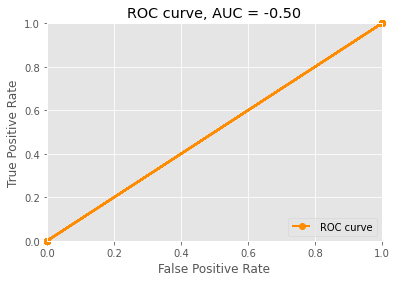

In [ ]:
#Plotting AUC Score 5a
plot_auc_score(tpr_5a,fpr_5a,auc_score_5a)

# **5_b.csv**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 5_b.csv to 5_b (2).csv


In [ ]:
df_b=pd.read_csv('5_b.csv')

for i in df_b.proba:
  if i > 0.5 or i== 0.5:
    df_b['y_predicted'] = 1
  else:
    df_b['y_predicted'] = 0

In [ ]:
#calculating total points 5_b
total_number_positive_points_5b, total_number_negative_points_5b,total_number_points_5b = calculate_total_pos_neg_points(df_b)
print(f"Total number of positive points in given dataset df_b is {total_number_positive_points_5b}")
print(f"Total number of negative points in given dataset df_b is {total_number_negative_points_5b}")
print(f"Total number of points in given dataset df_b is {total_number_points_5b}")

Total number of positive points in given dataset df_b is 100
Total number of negative points in given dataset df_b is 10000
Total number of points in given dataset df_b is 10100


In [ ]:
#Get confusion matrix 5_b
true_positive_5b, false_negative_5b, false_positive_5b, true_negative_5b = compute_confusion_matrix(df_b,'y_predicted')
print(f"True positives in df_b {true_positive_5b}")
print(f"False Negatives in df_b {false_negative_5b}")
print(f"False Positive in df_b {false_positive_5b}")
print(f"True Negative in df_b {true_negative_5b}")

True positives in df_b 0
False Negatives in df_b 100
False Positive in df_b 0
True Negative in df_b 10000


In [ ]:
#Get F1 score and Accuracy socre 5b
precision_5b = compute_precision(true_positive_5b, false_negative_5b, false_positive_5b, true_negative_5b,total_number_positive_points_5b,total_number_points_5b)
recall_5b = compute_recall(true_positive_5b, false_negative_5b, false_positive_5b, true_negative_5b,total_number_positive_points_5b,total_number_points_5b)
accuracy_score_5b = compute_accuracy_score(true_positive_5b, false_negative_5b, false_positive_5b, true_negative_5b,total_number_positive_points_5b,total_number_points_5b) 
f1_score_5b = compute_f1_score(precision_5b, recall_5b)

print(f"The F1 Score for dataset df_b/5b {f1_score_5b}")
print(f"The accuracy score for dataset df_b/5b {accuracy_score_5b}")

The F1 Score for dataset df_a/5b 0
The accuracy score for dataset df_a/5b 0.9900990099009901


In [ ]:
#AUC Score for 5b:
df_b.name = "df_b"
tpr_5b, fpr_5b, auc_score_5b,a_val_array_5b,best_threshold_5b = compute_auc_score(df_b,total_number_positive_points_5b,total_number_negative_points_5b)
print(f"TPR for the Thresholds {tpr_5b}")
print(f"FPR for the Thresholds {fpr_5b}")
print(f"AUC score for dataset df_a/5a {auc_score_5b}")

AttributeError: ignored

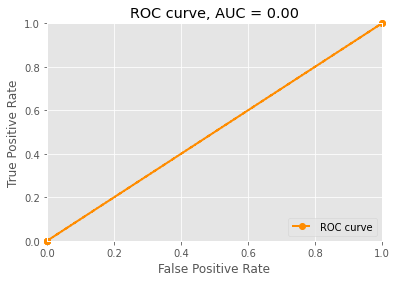

In [ ]:
#Plotting AUC Score for 5b
plot_auc_score(tpr_5b,fpr_5b,auc_score_5b)

# 5c.csv
Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric A for the given data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 5_c.csv to 5_c (3).csv


In [ ]:
df_c=pd.read_csv('5_c.csv')
df_c.head(10)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
5,0,0.595387
6,0,0.370288
7,0,0.299273
8,0,0.297000
9,0,0.266479


In [ ]:
df_c=pd.read_csv('5_c.csv')
df_c.rename(columns = {'prob':'proba'}, inplace = True) #renaming column as above functions refering to column as proba
for i in df_c.proba:
  if i > 0.5 or i==0.5:
    df_c['y_predicted'] = 1
  else:
    df_c['y_predicted'] = 0

In [ ]:
#calculating total points 5c
total_number_positive_points_5c, total_number_negative_points_5c,total_number_points_5c = calculate_total_pos_neg_points(df_c)
print(f"Total number of positive points in given dataset df_c is {total_number_positive_points_5c}")
print(f"Total number of negative points in given dataset df_c is {total_number_negative_points_5c}")
print(f"Total number of points in given dataset df_c is {total_number_points_5c}")

Total number of positive points in given dataset df_c is 1047
Total number of negative points in given dataset df_c is 1805
Total number of points in given dataset df_c is 2852


In [ ]:
#Get confusion matrix 5c
true_positive_5c, false_negative_5c, false_positive_5c, true_negative_5c = compute_confusion_matrix(df_c,'y_predicted')
print(f"True positives in df_c {true_positive_5c}")
print(f"False Negatives in df_c {false_negative_5c}")
print(f"False Positive in df_c {false_positive_5c}")
print(f"True Negative in df_c {true_negative_5c}")

True positives in df_c 1047
False Negatives in df_c 0
False Positive in df_c 1805
True Negative in df_c 0


In [ ]:
#Get F1 score and Accuracy socre 5c
precision_5c = compute_precision(true_positive_5c, false_negative_5c, false_positive_5c, true_negative_5c,total_number_positive_points_5c,total_number_points_5c)
recall_5c = compute_recall(true_positive_5c, false_negative_5c, false_positive_5c, true_negative_5c,total_number_positive_points_5c,total_number_points_5c)
accuracy_score_5c = compute_accuracy_score(true_positive_5c, false_negative_5c, false_positive_5c, true_negative_5c,total_number_positive_points_5c,total_number_points_5c) 
f1_score_5c = compute_f1_score(precision_5c, recall_5c)

print(f"The F1 Score for dataset df_c/5c {f1_score_5c}")
print(f"The accuracy score for dataset df_c/5c {accuracy_score_5c}")

The F1 Score for dataset df_c/5c 0.5370607848166197
The accuracy score for dataset df_c/5c 0.36711079943899017


In [ ]:
#AUC Score for 5c:
df_c.name = "df_5c"
tpr_5c, fpr_5c, auc_score_5c,a_val_array_5c,best_threshold_5c = compute_auc_score(df_c)
print(f"A value for correspoding thresholds are {a_val_array_5c}")
print(f"Best threshold value for the given a is {best_threshold_5c}")


ZeroDivisionError: ignored

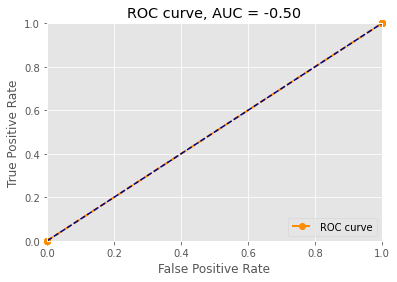

In [ ]:
#Plotting AUC Score for 5c
plot_auc_score(tpr_5c,fpr_5c,auc_score_5c)

# 5_d.csv Compute performance metrics(for regression) for the given data 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 5_d.csv to 5_d.csv


In [ ]:
df_c=pd.read_csv('5_c.csv')
df_c.head(10)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
5,0,0.595387
6,0,0.370288
7,0,0.299273
8,0,0.297000
9,0,0.266479


In [ ]:
mse = np.square(np.subtract(A, B)).mean()